<a href="https://colab.research.google.com/github/mishathefirst/AI-Systems-LabWork-5/blob/main/Task5_Selected_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

  Using cached pip-20.3.1-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.3.1.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.3-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.3.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.2.4-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.2.4.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.2.3-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.2.3.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 4.4 MB/s 
     |████████████████████████████████| 1.5 MB 14.5

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Первый элемент

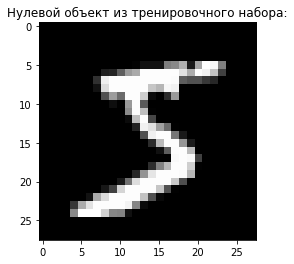

In [ ]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [ ]:
y_train[0]

5

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)


Преобразуем данные

In [ ]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)



NameError: ignored

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance


array([0.098, 0.168, 0.23 , 0.284, 0.333, 0.375, 0.408, 0.437, 0.464,
       0.488])

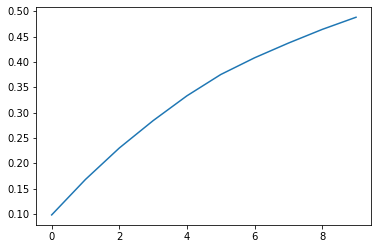

In [ ]:
plt.plot(np.arange(10), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [ ]:
len(X_test[0])

784

In [ ]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [ ]:
CM

array([[1462,    0,   42,   92,    3,   23,   31,   10,   30,    0],
       [   0, 1691,   35,    5,    1,    4,  201,  128,    7,    3],
       [  58,   10, 1014,   32,   65,   88,  400,   11,   82,    3],
       [  25,    6,   55, 1486,    9,  158,    7,   28,   78,   21],
       [   4,    7,   36,    4, 1377,   10,   38,   45,   23,  212],
       [  32,    1,  106,  346,   30,  721,   13,   68,  253,   21],
       [  23,   20,  848,   23,   20,   15,  652,   56,  107,    2],
       [  14,   44,    8,    2,   41,   41,   47, 1480,   16,  193],
       [  18,   21,   39,  108,   23,  326,   48,    8, 1135,   47],
       [  10,    2,    6,   40,  203,   42,   59,  138,   37, 1287]])

Число верно классифицирвоанных объектов класс 0

In [ ]:
CM[0][0]

1462

Число объектов класс 0 отнесенных к классу 8

In [ ]:
CM[0][8]

30